# Problem Statement

Q1. Business Case: OTT_platform - Data Exploration and Visualisation
About OTT_platform

OTT_platform is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on OTT_platform, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help OTT_platform in deciding which type of shows/movies to produce and how they can grow the business in different countries

Dataset

Link: Dataset_link
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/OTT_platform.csv

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on OTT_platform:

Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on OTT_platform
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description

Hints

The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does OTT_platform has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries

In [279]:
import pandas as pd
import numpy as np

In [280]:
ott=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/ott.csv")
ott.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Before we start to define and work on problem statement it is necessary to look at the data and make it ready for analysis, sq we first work on observing the data and solving issues in it**

#Questions
2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [281]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We see that ott dataframe has data for 8807 movies/shows having information on 12 parameters

**Challenges**

**Data types**

--we see from ott.info() that type, country, director, cast, rating are categorical attributes

--date_added, release_year are date time type variables. we convert their type from object to datetime

--duration attribute has duration for movies in minutes and TV shows in seasons. we separate the integer values in duration table to analyze it later


**Missing Data and Nested data**

-- we see that there are missing values 'NAN' in - 
1.director
2.cast
3.country
4.date_added
5.rating
6.duration columns 
we will go through each of these to devise suitable way to fill missing values for each attribute

--Nested values in categorical variables must also be dealt with, to be able to analyze the data properly - country,listed_in, director, cast columns

**Note: Observations, data cleaning and non graphical analysis (mentioned in points 2 and 3 of evaluation criteria)are conducted together, as insights from non graphical analysis are useful in cleaning the data and making it ready for preprosessing**

In [282]:
ott.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


The describe function shows how many missing, non null values are there in each of the variables, along with most frequently occuring value.

**Duration**

from above we see that duration and ratings columns have only 5-6 missing values.So, we will first try to fill the missing values in duration column.

When we check the rows with NaN duration, we see that ratings column has the duration value. So we will simply copy this value to duration column.

In [283]:
ott.loc[ott['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [284]:
ott['duration'].fillna(value=ott.loc[ott['duration'].isnull()]['rating'],inplace=True)

In [ ]:
#noticed duration in ratings later, otherwise was going to fill with average values
--ott.loc[ott['type']=='Movie']['duration'].dropna().astype('int64').mean()

In [ ]:
--ott['duration'].fillna(value=ott.loc[ott['type']=='Movie']['duration'].dropna().astype('int64').mean(),inplace=True)
--ott.info()

In [286]:
#checking if null duration rows have got filled with data in ratings column
ott.loc[(ott['show_id']=='s5542') | (ott['show_id']=='s5795') | (ott['show_id']=='s5814')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [287]:
# from above view We see that duration has been filled with duration value in ratings column inplace of null values in duration column
#to check if there is any unusual value in duration column, we see unique values in it
ott['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [288]:
#we use isna and sum to check the total number of null values present in duration column. we see that now there are no null values present in it
ott['duration'].isna().sum()

0

In [289]:
# now we split the duration column into duration and units to enable analysis of integer values later
ott[['duration','unit']]=ott['duration'].str.split(" ",n=-1,expand=True)

In [290]:
#now we convert the duration column to integer datatype
ott['duration']=ott['duration'].astype('int64')

In [291]:
ott['unit']=ott['unit'].astype('string')

In [292]:
ott.info()
#now we have duration column ready for final analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  unit          8807 non-null   string
dtypes: int64(2), object(10), string(1)
memory usage: 894.6+ KB


** We have seen that rating data has following issues**

1. missing values
2.duration values

In [293]:
ott.loc[ott['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37,Movies,Oprah Winfrey sits down with director Ava DuVe...,min
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",Season
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",Season
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115,Dramas,"Amid the chaos and horror of World War II, a c...",min


In [294]:
#we will fill the null values with mode of rating column to perform simple imputation
ott['rating'].fillna(value=ott['rating'].mode()[0],inplace=True)

In [295]:
ott['rating'].isna().sum()
# we see that now there are no null values in rating column

0

In [296]:
# we will now fix the incorrect rating values where duration is there in place of rating
mode_rating=ott['rating'].mode()[0]

In [297]:
# we will now fix the incorrect rating values where duration is there in place of rating
ott.iloc[5541,8]=mode_rating
ott.iloc[5794,8]=mode_rating
ott.iloc[5813,8]=mode_rating

***Que - how to change value in all rows with code instead of manually selecting each row***

--ott.loc[(ott['show_id']=='s5542') | (ott['show_id']=='s5795') | (ott['show_id']=='s5814')]['rating']=mode_rating

not working

In [298]:
# now we check the unique values to see that the data is consistent and correct. no unusal value is present in data now.
ott['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

#Date_added

1. missing values - 10 missing (seen in ott.info() above)
**Now we try to impute the Nan values in date_added column**

We do this by assuming that show/movie was added on latest date_added.

In [299]:
#we first convert date_added to datetime data type
ott['date_added']=pd.to_datetime(ott['date_added'])

In [300]:
ott['date_added'].isnull().sum()

10

In [301]:
# here we see that release year is available for all shows/movies where date_added is null, so we can easily replace Nan with last date of release year
ott.loc[ott['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Seasons
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...,Seasons
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,Seasons
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,Seasons
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",Seasons
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...,Seasons
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",Seasons
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Seasons
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Seasons
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Seasons


In [302]:
ott['date_added'].fillna(value=ott['date_added'].max(),inplace=True)

In [303]:
#We do this by assuming that show/movie was added on 31st December of release year
#ott['date_added'].fillna(value=ott['release_year'].astype('string') + '-12-31',inplace=True)

In [304]:
#we check if we have got the required date format in date_added column by looking at one of the null value row
ott[ott['show_id']=='s7407']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2021-09-25,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Seasons


In [305]:
# we check if all values have got filled in date_added column and its datatype is datetime
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  unit          8807 non-null   string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 894.6+ KB


#Country column

**Since country column has number of countries listed, we assume that country column actually provides list of countries where that movie/show was published/added on ott, instead of country where show was produced as is given in problem description**

There are 2 issues with data in this column
1. Missing values -831 missing
2. Nested values

we will first resolve missing values, so that we can work on nested values in next step.
- assuming this is country where show/movie was published/added we fill the missing values with mode of country column

In [306]:
#as most of the values in country column are missing we add mode of country column to missing values
ott['country'].fillna(value=ott['country'].mode()[0],inplace=True)

In [307]:
# we check if all null values in country column have got filled, now we can proceed to solve the nested data issue in country column
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  unit          8807 non-null   string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 894.6+ KB


In [308]:
ott.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Seasons


In [309]:
#now we create a deep copy of ott data to stack the nested country column for release/publishing in multiple counties
df=ott.copy(True)

In [310]:
#split the column into list of multiple release countries
df['country']=df['country'].str.split(",",n=-1,expand=False)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Seasons


In [311]:
#stack the contry series of list of countries in dataframe
dff=df.explode('country')

In [312]:
#check if explode has iven required result
dff.loc[dff['show_id']=='s30']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",United States,2021-09-19,2013,PG-13,106,Thrillers,"Blackmailed by his company's CEO, a low-level ...",min
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",India,2021-09-19,2013,PG-13,106,Thrillers,"Blackmailed by his company's CEO, a low-level ...",min
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",France,2021-09-19,2013,PG-13,106,Thrillers,"Blackmailed by his company's CEO, a low-level ...",min


In [313]:
#we check unique values to see if there are any unusal values in data, we see that there are many repeated countries in unique values due to leadinga and trailing spaces
dff['country'].unique()

array(['United States', 'South Africa', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Lebanon', 'R

In [314]:
#we remove leading and trailing extra spaces in strings, which will cause error in categorization
dff['country']=dff['country'].str.strip()

In [315]:
#after stacking country we have 10850 rows with unique release countries
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10850 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       10850 non-null  object        
 1   type          10850 non-null  object        
 2   title         10850 non-null  object        
 3   director      7880 non-null   object        
 4   cast          9844 non-null   object        
 5   country       10850 non-null  object        
 6   date_added    10850 non-null  datetime64[ns]
 7   release_year  10850 non-null  int64         
 8   rating        10850 non-null  object        
 9   duration      10850 non-null  int64         
 10  listed_in     10850 non-null  object        
 11  description   10850 non-null  object        
 12  unit          10850 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 1.2+ MB


In [316]:
#a=ott.copy(True)

In [317]:
#a[['country1','country2','country3','country4','country5','country6','country7','country8','country9','country10','country11','country12']]=(ott['country'].str.split(",",n=-1,expand=True))

In [318]:
#a.head()

#Doubts
#How to stack() on grouped by dataframe?
# how to stack selected columns in dataframe - pivot?
#is there a stack function for list present in series? which can work like explode?

In [319]:
#get all 'countries' undre column 'name' in one column by adding duplicate rows
#melted=pd.melt(a,id_vars=['show_id','type','title','director','cast','date_added','release_year','rating','duration','listed_in','description','unit','country'],
#       var_name="countries",
#       value_name="name")
#melted.head()

In [320]:
#drop the null countires, we have already filled one country where there was no country in original dataset
#melted.dropna(subset='name',inplace=True)

In [321]:
#remove extra columns
#melted.drop(columns=['country','countries'],inplace=True)

In [322]:
#rename columns, we have got the same dataframe as from explode
#melted.rename(columns={'name':'country'},inplace=True)
#melted.info()

In [323]:
#ott.groupby(['show_id','type','title','director','cast','date_added','release_year','rating','duration','listed_in','description'])['country'].str.split(",",n=-1,expand=True).stack().str.strip()

In [233]:
#ott['country'].str.split(",",n=-1,expand=True).stack().str.strip().nunique()

In [234]:
#ott['country'].str.split(",",n=-1,expand=True).stack().str.strip().unique()

#Genre

listed_in column does not have any non null values, we will only work on unnesting the values and stacking them
1. nested values

In [364]:
genre=dff.copy(True)

In [365]:
genre['listed_in']=genre['listed_in'].str.split(",",n=-1,expand=False)

In [366]:
genre=genre.explode('listed_in')

In [367]:
genre['listed_in']=genre['listed_in'].str.strip()

In [368]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23764 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       23764 non-null  object        
 1   type          23764 non-null  object        
 2   title         23764 non-null  object        
 3   director      17197 non-null  object        
 4   cast          21916 non-null  object        
 5   country       23764 non-null  object        
 6   date_added    23764 non-null  datetime64[ns]
 7   release_year  23764 non-null  int64         
 8   rating        23764 non-null  object        
 9   duration      23764 non-null  int64         
 10  listed_in     23764 non-null  object        
 11  description   23764 non-null  object        
 12  unit          23764 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 2.5+ MB


#Director and cast

Challenges
1. missing values - director - 2634 missing, cast - 825 missing (based on ott.info() performed earlier
2. nested values

In cast and director column we will ignore the missing values for simplification purpose, as simple imputation based on mode will lead to logically incorrect imputation results.

We will only work on nested data for both and drop the null values while analyzing for these variables



In [239]:
#def func(data,countri):
#data.loc[(data['director'].isnull) & (data['country']==countri)]['director']=data.loc[data['country']==countri].agg(pd.Series.mode)
#  return

In [240]:
#dff.groupby('country')['director'].fillna(value=pd.Series.mode,inplace=True)

In [329]:
director=genre.copy(True)

In [330]:
director['director']=director['director'].str.split(",",n=-1,expand=False)

In [331]:
director=director.explode('director')

In [332]:
director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25900 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       25900 non-null  object        
 1   type          25900 non-null  object        
 2   title         25900 non-null  object        
 3   director      19333 non-null  object        
 4   cast          23751 non-null  object        
 5   country       25900 non-null  object        
 6   date_added    25900 non-null  datetime64[ns]
 7   release_year  25900 non-null  int64         
 8   rating        25900 non-null  object        
 9   duration      25900 non-null  int64         
 10  listed_in     25900 non-null  object        
 11  description   25900 non-null  object        
 12  unit          25900 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 2.8+ MB


In [245]:
#movie_director=dff.loc[dff['type']=='Movie']['director'].mode()[0]

In [246]:
#tvshow_director=dff.loc[dff['type']=='TV Show']['director'].mode()[0]

In [247]:
#x=ott
#def func(x,country,type):
#  return x.loc[(x['country']=='United States') & (x['type']=='TV Show')]['director'].mode()[0]

In [248]:
#x['director'].apply(func(x,"United States","TV Show"))

# Doubt
Can we use groupby and mode with fillna? as was required in director column

#Cast

We work only on stacking the nested cast values, and we will drop the nan values when we analyze cast and director

In [333]:
cast=director.copy(True)

In [334]:
cast['cast']=cast['cast'].str.split(",",n=-1,expand=False)

In [335]:
cast=cast.explode('cast')

In [336]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  int64         
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
 12  unit          202065 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 21.6+ MB


#1. Defining Problem Statement and Analysing basic metrics
#3. Non graphical analysis continued from previous section

***Note: we use ott dataset for analyzing few questions which dont require analysis of country, director and cast columns***

**Problem statement**: Analyze the data and generate insights that could help ott in deciding which type of shows/movies to produce and how they can grow the business in different countries.

***Note: Business insights and recommendations will be put under heading B and R respectively whereever given***

Basic metrics and basic non graphical analysis:

1. The start and end year for data available on ott
2. number of unique shows and movies
3. release start and end date for movies and TV Shows
4. number and list of countries where ott operates
5. number and list of genres available on ott
6. number of movies/shows produced by directors
7. number of genres produced by directors


1. The start and end year for data added on ott

**B**:we see that shows/movies is added on ott starting from Jan 2008. Last added date is in  september 2021. we have data between this duration

In [253]:
ott['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [254]:
ott['date_added'].max()

Timestamp('2021-09-25 00:00:00')

2. Now we find the number of unique shows and movies added on ott, assuming show_id is unique

In [255]:
ott['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**B**: We see that a total of 6131 movies and 2676 shows have been added on ott

3. release start and end date for movies and TV Shows

In [256]:
ott.loc[ott['type']=='Movie']['release_year'].min()

1942

In [257]:
ott.loc[ott['type']=='Movie']['release_year'].max()

2021

In [258]:
ott.loc[ott['type']=='TV Show']['release_year'].min()

1925

In [259]:
ott.loc[ott['type']=='TV Show']['release_year'].max()

2021

**B**: Here we see that old movies and TV shows released from 1942 and 1925 respectively have been added on ott along with the newly released shows which get regularly added

4. number and list of countries where ott operates
***here we use dff dataset, which has been processed for missing and nested values in country column***

**B**: ott operated in 123 different countries, where it provides content

In [260]:
dff['country'].nunique()

123

In [261]:
dff['country'].unique()

array(['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China',
       'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea',
       'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand',
       'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel',
       'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait',
       'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden',
       'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta', 'Namibia', 'A

5. number and list of genres available on OTT_platform for tv shows and movies
**B**:there are 42 unique genres available on OTT_platform, of which 20 genres are for movies and 22 for tv shows, we also see that top 3 genres are same for movies and tv shows

which are  - International,Dramas, Comedies

here we note that every movie is listed in multiple genres.

In [337]:
genre['listed_in'].nunique()

42

In [339]:
genre.groupby('type')['listed_in'].nunique()

type
Movie      20
TV Show    22
Name: listed_in, dtype: int64

In [340]:
genre.groupby('type')['listed_in'].value_counts()

type     listed_in                   
Movie    International Movies            3513
         Dramas                          3202
         Comedies                        1981
         Action & Adventure              1182
         Documentaries                   1118
         Independent Movies              1040
         Children & Family Movies         845
         Thrillers                        806
         Romantic Movies                  722
         Horror Movies                    458
         Music & Musicals                 429
         Sci-Fi & Fantasy                 380
         Stand-Up Comedy                  344
         Sports Movies                    265
         Classic Movies                   152
         LGBTQ Movies                     116
         Cult Movies                       93
         Faith & Spirituality              89
         Anime Features                    78
         Movies                            70
TV Show  International TV Shows          1

6. the number of tv shows and movies produced by directors

***Have ordered the directors in descending order based on total number of movies/shows produced by them***

In [265]:
directed=pd.DataFrame(director.groupby('director')['show_id'].nunique())

In [266]:
directed.sort_values(by='show_id',ascending=False)

,show_id
director,
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
Marcus Raboy,16
...,...
J. Davis,1
J. Lee Thompson,1
J. Michael Long,1


In [267]:
director.loc[director['director']=='Rajiv Chilaka']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,64,Children & Family Movies,Things get spooky when Bheem and his buddies t...,min
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2009,TV-Y7,68,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,min
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2011,TV-Y7,67,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,min
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2010,TV-Y7,66,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,min
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64,Children & Family Movies,When a stranger tries to steal an amulet from ...,min
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,64,Children & Family Movies,To save the kingdom of Valhalla from invasion ...,min
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,65,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ...",min
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2013,TV-Y7,64,Children & Family Movies,After learning of a samurai village under thre...,min
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-07-22,2012,TV-Y7,68,Children & Family Movies,When two evil entities kidnap a princess in a ...,min
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,68,Children & Family Movies,"Centuries after the end of a conqueror's rule,...",min


7. number of genres produced by directors

**B**: from 6 and 7 point analysis it can be seen that the top directors who have directed movies in different genres are not the ones who have produced most number of movies



In [268]:
genres=pd.DataFrame(director.groupby('director')['listed_in'].nunique())

In [269]:
genres.sort_values(by='listed_in',ascending=False)

,listed_in
director,
Martin Scorsese,9
Vishal Bhardwaj,8
Vikramaditya Motwane,8
Brad Anderson,7
Ron Howard,7
...,...
Richard Donner,1
Eric Stoltz,1
Richard Claus,1


# Questions to answer the business problem
**This section mainly works on points - 4 to 8 of evaluation criteria**

***Note: Business insights and recommendations will be put under heading B and R respectively wherever given***

1. How has the number of movies and TV shows released changed in last 20-30 years?


In [270]:
# we import matplotlib and seaborne for visual analysis
import matplotlib.pyplot as plt
import seaborn as sns

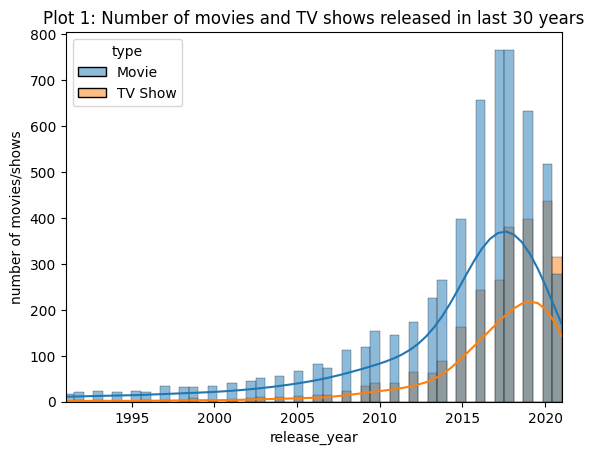

In [271]:
#1.How has the number of movies and TV shows released changed in last 20-30 years

sns.histplot(data=ott,x='release_year',hue='type',kde=True)
plt.title("Plot 1: Number of movies and TV shows released in last 30 years")
plt.xlim(left=1991,right=2021)
plt.ylabel("number of movies/shows")
plt.show()

**B** 

this plot shows that both movies and tv shows released have increased exponentially in last 10 years.

both content types have increased in same manner in last 20-30 years, both kde plots show similar pattern. 

# 2. Does OTT_platform focus more on TV shows then movies in recent years?

# 3. Comparison between TV shows and Movies

In earlier plot, we saw how movies/tv shows released has changed over last 30 years. Now we will see how movies /tv shows released have changed for top 5 content consuming countries over last 30 years in plot 2.


In [341]:
# we use dff dataframe for analyzing country, we will first get names of top 5 countries consuming OTT_platform content
countries=dff['country'].value_counts().index[0:5]

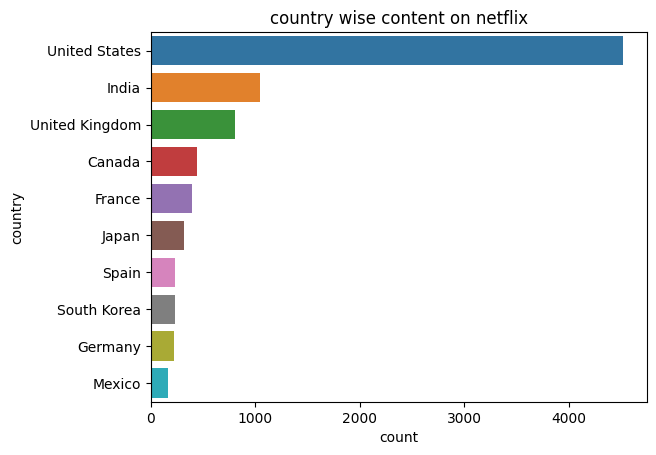

In [342]:
# a plot to show top 10 content consuming countries
sns.countplot(data=dff,y='country',order=dff['country'].value_counts().index[0:10])
plt.title("country wise content on ott")
plt.show()

In [343]:
#filter dataframe to get data of top 5 countries consuming ott content and 
top_countries=dff.loc[(dff['country'].isin(countries)) & (dff['release_year']>1990)]

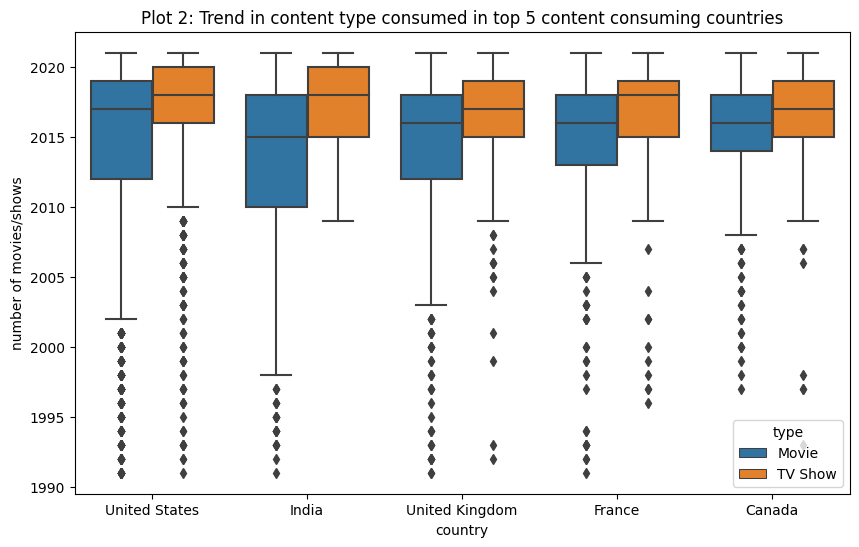

In [344]:
plt.figure(figsize=(10,6))
sns.boxplot(data=top_countries,x='country',y='release_year',hue='type')
plt.title("Plot 2: Trend in content type consumed in top 5 content consuming countries")
plt.ylabel("number of movies/shows")
plt.show()

**B**

1. This plot clearly shows that ott has started focussing more on tv shows than movies in recent years
2. The trend of TV shows mainly started around 2010 as shown by the lowest value of TV show box plot for top 5 countries
3. The top 5 countries consuming ott content are  - United States, India,UK, France,Canada
4. India has been the oldest consumer of movies since around 1997
5. Here we ignore outliers as content has been produced since long time, outliers only indicate handful of movies were produced before respective years 

In [392]:
#we are comparing genres vs release year
genress=ott.copy(True)

In [393]:
genress['listed_in']=genress['listed_in'].str.split(",",n=-1,expand=False)


In [394]:
genress=genress.explode('listed_in')

In [395]:
genress['listed_in']=genress['listed_in'].str.strip()

In [397]:
genress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19323 non-null  object        
 1   type          19323 non-null  object        
 2   title         19323 non-null  object        
 3   director      13439 non-null  object        
 4   cast          17819 non-null  object        
 5   country       19323 non-null  object        
 6   date_added    19323 non-null  datetime64[ns]
 7   release_year  19323 non-null  int64         
 8   rating        19323 non-null  object        
 9   duration      19323 non-null  int64         
 10  listed_in     19323 non-null  object        
 11  description   19323 non-null  object        
 12  unit          19323 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 2.1+ MB


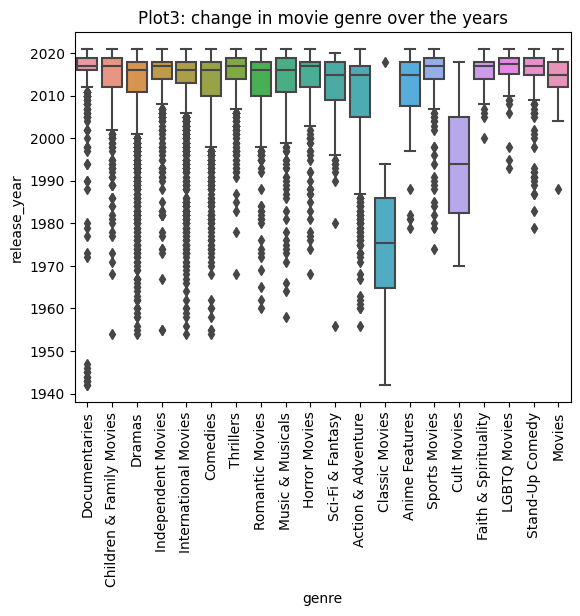

In [398]:
# we again use genre dataset here to analyze how genre has changed for movies over all years

sns.boxplot(data=genress.loc[(genress['type']=='Movie')],x='listed_in',y='release_year')
plt.xticks(rotation=90)
plt.xlabel('genre')
plt.title('Plot3: change in movie genre over the years')
plt.show()

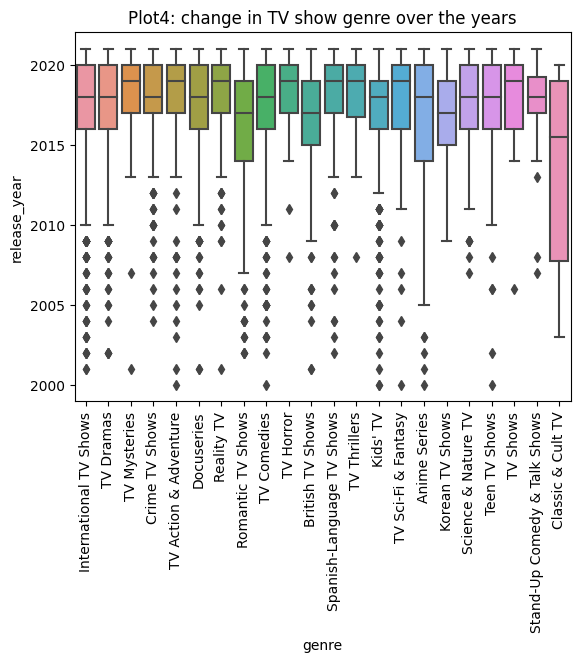

In [399]:

# we again use genre dataset here to analyze how genre has changed for tv shows over the years

sns.boxplot(data=genress.loc[(genress['type']=='TV Show') & (genress['release_year']>1999)],x='listed_in',y='release_year')
plt.xticks(rotation=90)
plt.xlabel('genre')
plt.title('Plot4: change in TV show genre over the years')
plt.show()

**B**

From plot 3 and plot 4 we can compare how genres for movies and TV shows have changed over the years, keeping in mind that TV shows trend mainly started in 2010
1. We can see that earlier until 2010 most of the movies that were categorized only into 2 genres - Classic and Cult.
2. It was only around 2010 when a sharp trend of TV shows began, that they started to classify movies as well as TV shows in variety of genres
3. as seen earlier in non visual analysis the top 3 genres where most movies are produced are - International, Dramas and comedies for both movies and TV shows

# 4. What is the best time to launch a TV show

for this we will analyze the date added month wise for all year

we use ott dataset over here as it has unique 

In [351]:
best_time=ott.copy(True)

In [352]:
best_time['month']=best_time['date_added'].dt.month

In [400]:
best_time['year']=best_time['date_added'].dt.year

In [402]:
tv_show=best_time.loc[best_time['type']=='TV Show']

In [405]:
data=pd.pivot_table(tv_show,index='month',columns='year',values='show_id',aggfunc='count')

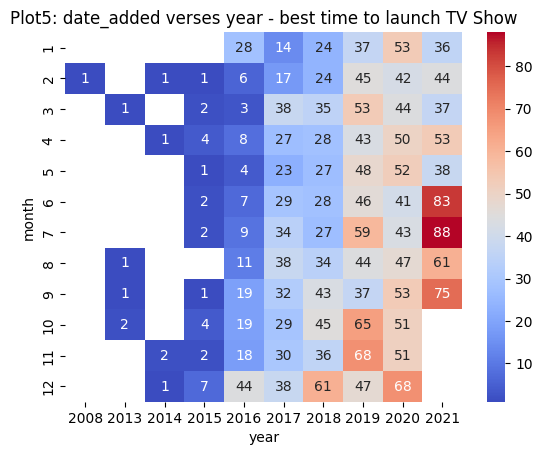

In [410]:
sns.heatmap(data,annot=True,cmap='coolwarm')
plt.title("Plot5: date_added verses year - best time to launch TV Show")
plt.show()

**B**

From plot 5 we can see that most of the TV Shows are launched in May-July and September-December, when there is festive season or holiday in different parts of the world.

So it seems from this that the best time to launch a TV show is during September-December, when launches have been consistently high across years.

# 5.what content is available in different countries?

For this we will look at content from top 5 countries consuming ott for top 10 genres 

we will use 'genre' dataframe for this where we have stacked both countries and genres

In [415]:
genre.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


In [412]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23764 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       23764 non-null  object        
 1   type          23764 non-null  object        
 2   title         23764 non-null  object        
 3   director      17197 non-null  object        
 4   cast          21916 non-null  object        
 5   country       23764 non-null  object        
 6   date_added    23764 non-null  datetime64[ns]
 7   release_year  23764 non-null  int64         
 8   rating        23764 non-null  object        
 9   duration      23764 non-null  int64         
 10  listed_in     23764 non-null  object        
 11  description   23764 non-null  object        
 12  unit          23764 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 2.5+ MB


In [430]:
top_tv_genre=genress[genress['type']=='TV Show']['listed_in'].value_counts().index[0:10]

In [431]:
#filter data for top 10 countries
data1=genre.loc[(genre['country'].isin(countries)) & genre['listed_in'].isin(top_tv_genre)]

In [437]:
genre_country=pd.pivot_table(data1,index='listed_in',columns='country',values='show_id',aggfunc='count')

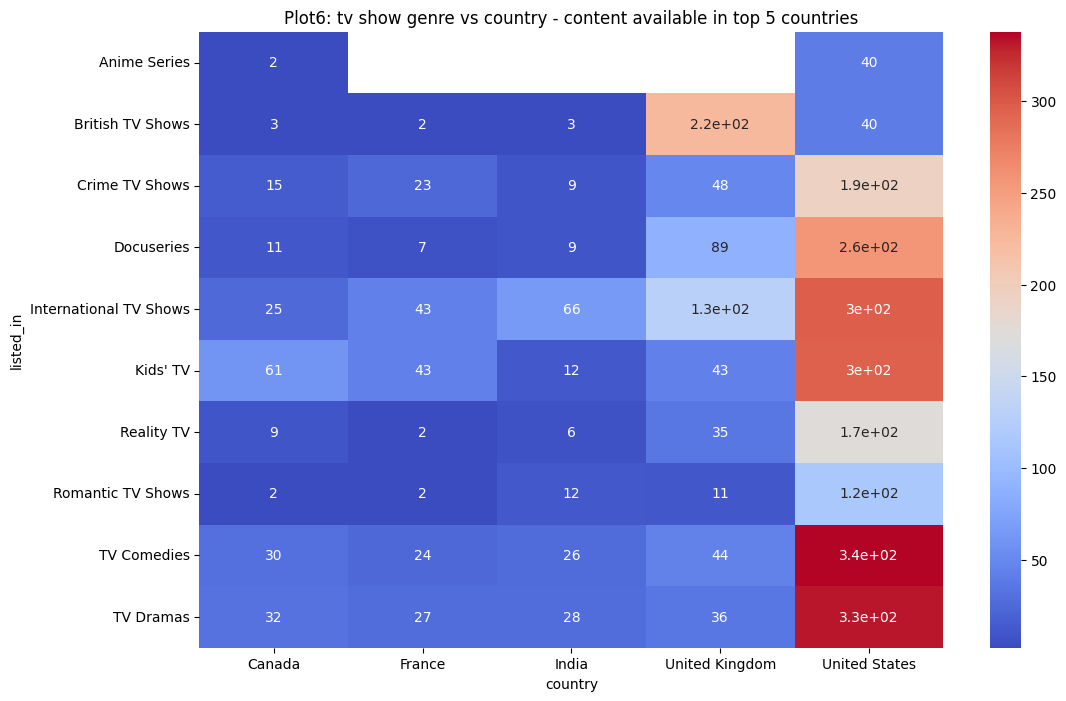

In [444]:
plt.figure(figsize=(12,8))
sns.heatmap(genre_country,annot=True,cmap='coolwarm')
plt.title("Plot6: tv show genre vs country - content available in top 5 countries")
plt.show()

In [439]:
top_movie_genre=genress[genress['type']=='Movie']['listed_in'].value_counts().index[0:10]

In [440]:
#filter data for top 10 countries
data2=genre.loc[(genre['country'].isin(countries)) & genre['listed_in'].isin(top_movie_genre)]

In [442]:
genre_country1=pd.pivot_table(data2,index='listed_in',columns='country',values='show_id',aggfunc='count')

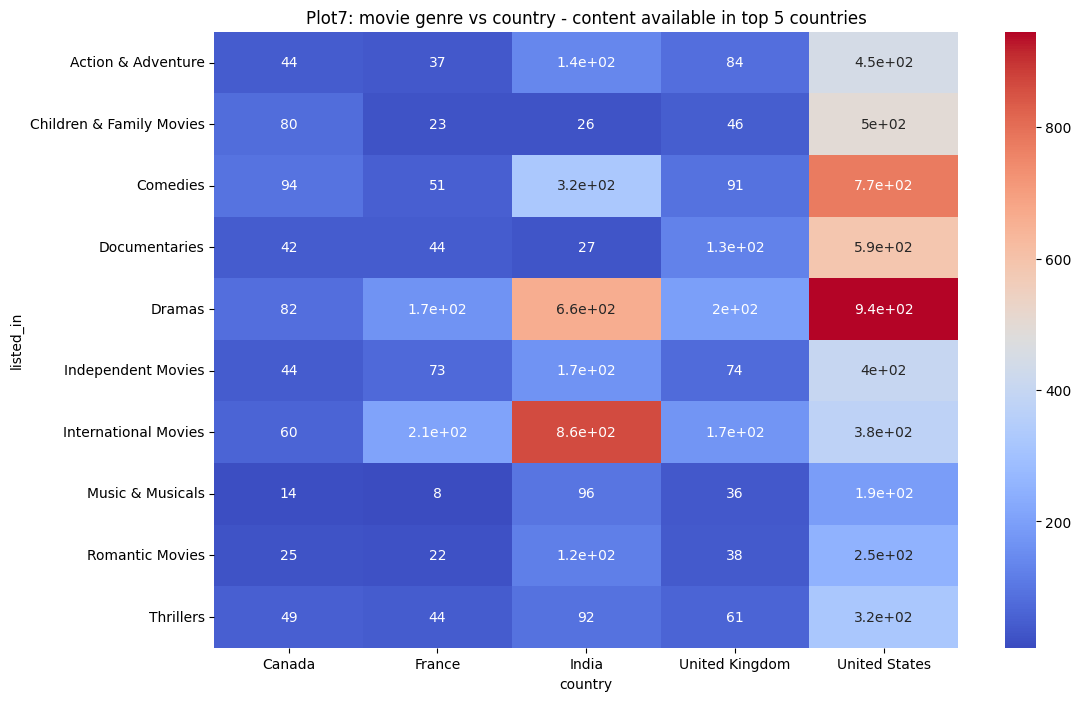

In [446]:
plt.figure(figsize=(12,8))
sns.heatmap(genre_country1,annot=True,cmap='coolwarm')
plt.title("Plot7: movie genre vs country - content available in top 5 countries")
plt.show()

# 6. Actors with most play time in movies and Actors with most seasons in tv shows

In [447]:
#we are comparing genres vs release year
actors=ott.copy(True)

In [448]:
actors['cast']=actors['cast'].str.split(",",n=-1,expand=False)


In [450]:
actors=actors.explode('cast')

In [451]:
actors['cast']=actors['cast'].str.strip()

In [453]:
#now we have actor level info for unique show_id
actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64951 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       64951 non-null  object        
 1   type          64951 non-null  object        
 2   title         64951 non-null  object        
 3   director      45938 non-null  object        
 4   cast          64126 non-null  object        
 5   country       64951 non-null  object        
 6   date_added    64951 non-null  datetime64[ns]
 7   release_year  64951 non-null  int64         
 8   rating        64951 non-null  object        
 9   duration      64951 non-null  int64         
 10  listed_in     64951 non-null  object        
 11  description   64951 non-null  object        
 12  unit          64951 non-null  string        
dtypes: datetime64[ns](1), int64(2), object(9), string(1)
memory usage: 6.9+ MB


In [463]:
actor_time=pd.pivot_table(actors,index='cast',columns='type',values='duration',aggfunc='sum').reset_index()

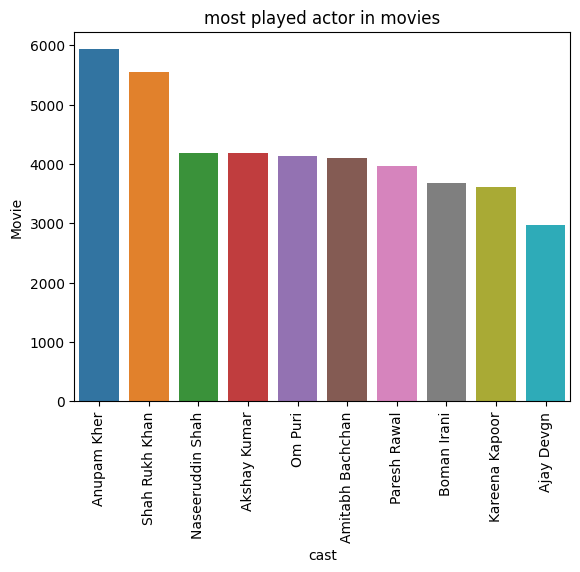

In [496]:
sns.barplot(data=actor_time.sort_values(by='Movie',ascending=False).set_index('cast').reset_index()[['cast','Movie']][0:10],x='cast',y='Movie')
plt.xticks(rotation=90)
plt.title("most played actor in movies")
plt.show()

In [495]:
actor_time.sort_values(by='TV Show',ascending=False).set_index('cast').reset_index()[['cast','TV Show']][0:10]

type,cast,TV Show
0,Takahiro Sakurai,37.0
1,Vincent Tong,32.0
2,Kate Walsh,31.0
3,Yuki Kaji,31.0
4,Ashleigh Ball,31.0
5,Brian Drummond,29.0
6,Jun Fukuyama,28.0
7,Steven Yeun,27.0
8,Daisuke Ono,27.0
9,Junichi Suwabe,27.0


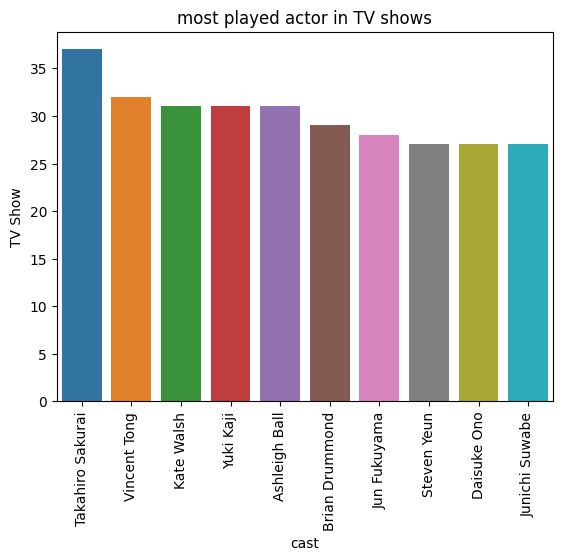

In [498]:
sns.barplot(data=actor_time.sort_values(by='TV Show',ascending=False).set_index('cast').reset_index()[['cast','TV Show']][0:10],x='cast',y='TV Show')
plt.xticks(rotation=90)
plt.title("most played actor in TV shows")
plt.show()

**B**


From above 2 plots we see that most played actors in movies are - Anupam Kher, Shahrukh Khan, Naseerudin Shah

whereas most duration/seasons actors in TV shows are Takahiro Sakurai, Vincent Tong and kate Walsh

Business Insights and Recommendations:

Plot 1

1. Both movies and tv shows released have increased exponentially in last 10 years.where they reach the highest point around 2017-2018 post which clear rise can be seen in rate of release of TV shows compared to movies.

Plot2

1.A clear shift can be seen from movies to tv shows after 2015.
(The median and IQR of box plot indicates that more tv shows (75% got released after 2015) are getting released compared to movies post 2015 in all of the top 5 countries.)

This answers second question that - off lately in last 3-4 years ott has clearly started focussing more on TV shows than movies, which is also visible through plot 1.

Plot5

It seems from this that the best time to launch a TV show is during September-December, when launches have been consistently high across years.

Plot 6

Following are best genres in TV shows for top 5 countries
1. Canada -Kids TV
2. France - international TV shows, Kids TV at a Tie
3. India- International TV Shows
4. UK - British TV Shows
5. US - TV Comedies

ott should produce more shows in above genre for respective countries

Plot 7
Following are best genres in Movies for top 5 countries
1. Canada -Comedies
2. France - international Movies
3. India- international Movies
4. UK - Dramas
5. US - Dramas

ott should produce more shows in above genre for respective countries